# Cellshapy: dSprites dataset

The [dSprites dataset](https://github.com/deepmind/dsprites-dataset) was developed to study disentangled represetation learning. dSprites is a dataset of 2D shapes procedurally generated from 6 ground truth independent latent factors. These factors are color, shape, scale, rotation, x and y positions of a sprite.

![figure](https://github.com/deepmind/dsprites-dataset/blob/master/dsprites.gif "dSprites")




In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import os, sys, glob
from IPython.display import HTML
import numpy as np
%load_ext autoreload
%autoreload 2
import cellshapy

Reading config from /home/debacwa/.config/cellshapy


/home/debacwa/Work/cellshapy/cellshapy/config/features.py:23: UserWarning: Package mahotas is missing. Some features are not available


# Download dSprites dataset (.npz) 

In [2]:
URL='https://github.com/deepmind/dsprites-dataset/blob/master/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz?raw=true'
#filename='dsprites.npz'
import urllib.request
data = urllib.request.urlretrieve(URL, filename=None) # if filename not given, saved as temporary file
filename = data[0]
filename

'/tmp/tmpf6x24jjh'

# Read data

In [3]:
# Load dataset
dataset_zip = np.load(filename, encoding='latin1')
#print('Keys in the dataset:', dataset_zip.keys())
imgs = dataset_zip['imgs']
latents_values = dataset_zip['latents_values']
latents_classes = dataset_zip['latents_classes']
metadata = dataset_zip['metadata'][()]
#print('Metadata: \n', metadata)

In [4]:
for feature, number in zip(metadata['latents_names'], metadata['latents_sizes']):
    print(feature, number)

color 1
shape 3
scale 6
orientation 40
posX 32
posY 32


In [5]:
# Helper function to show images
def show_images_grid(imgs_, num_images=25):
  ncols = int(np.ceil(num_images**0.5))
  nrows = int(np.ceil(num_images / ncols))
  _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 3, ncols * 3))
  axes = axes.flatten()

  for ax_i, ax in enumerate(axes):
    if ax_i < num_images:
      ax.imshow(imgs_[ax_i], cmap='Greys_r',  interpolation='nearest')
      ax.set_xticks([])
      ax.set_yticks([])
    else:
      ax.axis('off')

## Select only shapes in fixed position (skip poX and posY tranlations)

In [6]:
# select images in fixed position
imgs2 = imgs[0::(32*32)]
imgs2.shape

(720, 64, 64)

## Split into 3*6 movies

There are:
- 3 shapes
- 6 scalings
- 40 orientations

Here, we split the array such that we have 3*6 separate videos, each with 40 frames

In [7]:
# split images into 18 'movies' with different shapes and scales
imgs3 = np.split(imgs2, 3*6)
imgs3[0].shape

(40, 64, 64)

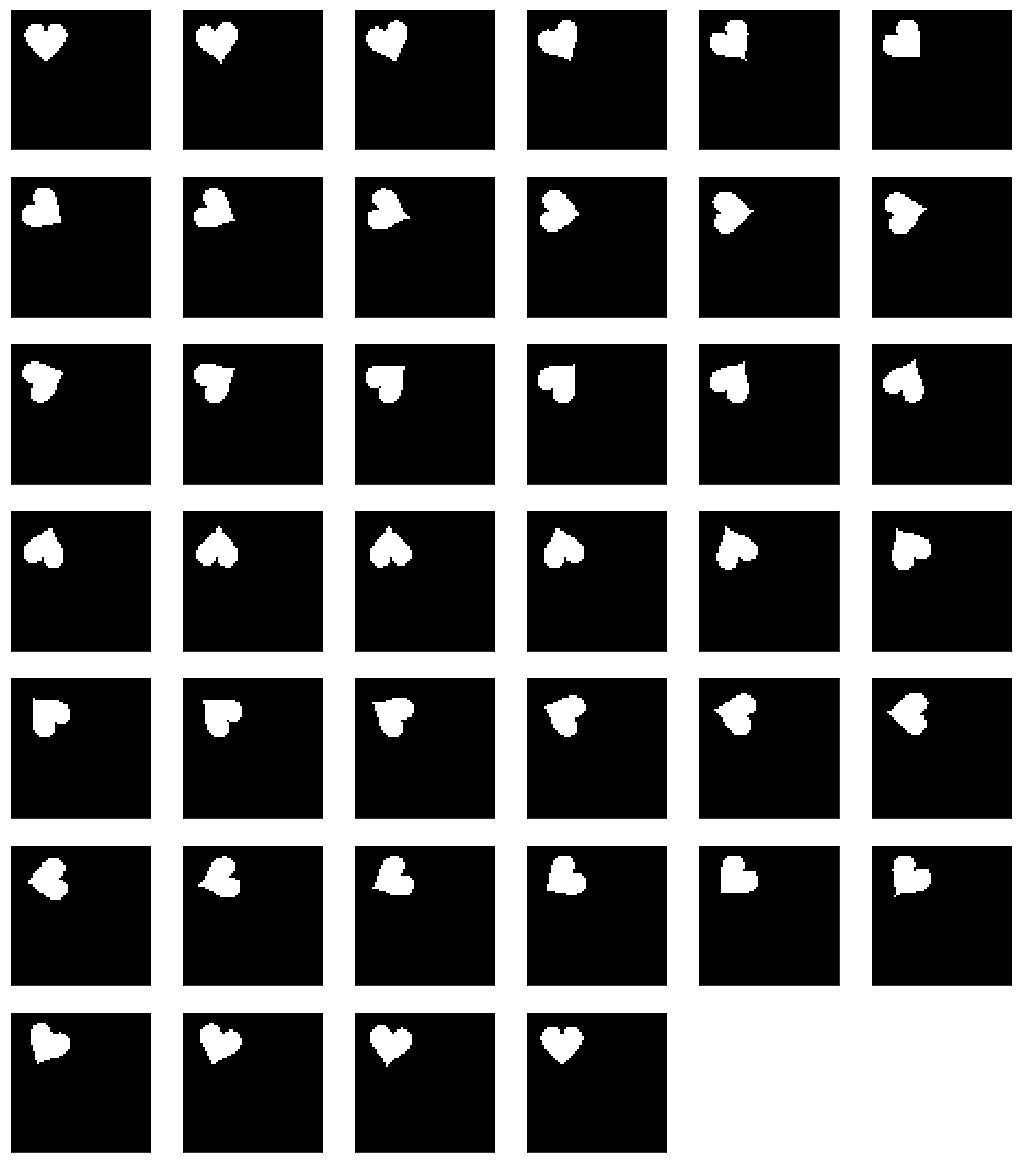

In [8]:
show_images_grid(imgs3[-1], num_images=40)

In [11]:
len(imgs3)

18

In [20]:
metadata

{'date': 'April 2017',
 'description': 'Disentanglement test Sprites dataset.Procedurally generated 2D shapes, from 6 disentangled latent factors.This dataset uses 6 latents, controlling the color, shape, scale, rotation and position of a sprite. All possible variations of the latents are present. Ordering along dimension 1 is fixed and can be mapped back to the exact latent values that generated that image.We made sure that the pixel outputs are different. No noise added.',
 'version': 1,
 'latents_names': ('color', 'shape', 'scale', 'orientation', 'posX', 'posY'),
 'latents_possible_values': {'orientation': array([0.        , 0.16110732, 0.32221463, 0.48332195, 0.64442926,
         0.80553658, 0.96664389, 1.12775121, 1.28885852, 1.44996584,
         1.61107316, 1.77218047, 1.93328779, 2.0943951 , 2.25550242,
         2.41660973, 2.57771705, 2.73882436, 2.89993168, 3.061039  ,
         3.22214631, 3.38325363, 3.54436094, 3.70546826, 3.86657557,
         4.02768289, 4.1887902 , 4.34989

In [31]:
metadata['latents_possible_values']['scale']
#metadata['latents_possible_values']['shape']

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [45]:
i=0; j=0
annotations = []
for _ in imgs3:
    scale = metadata['latents_possible_values']['scale'][i]
    shape = metadata['latents_possible_values']['shape'][j]
    
    i+=1
    if i == len(metadata['latents_possible_values']['scale']):
        j += 1
        i = 0
    annotations.append({'scale':scale, 'shape':int(shape), 'label':int(shape)})

In [46]:
annotations

[{'scale': 0.5, 'shape': 1, 'label': 1},
 {'scale': 0.6, 'shape': 1, 'label': 1},
 {'scale': 0.7, 'shape': 1, 'label': 1},
 {'scale': 0.8, 'shape': 1, 'label': 1},
 {'scale': 0.9, 'shape': 1, 'label': 1},
 {'scale': 1.0, 'shape': 1, 'label': 1},
 {'scale': 0.5, 'shape': 2, 'label': 2},
 {'scale': 0.6, 'shape': 2, 'label': 2},
 {'scale': 0.7, 'shape': 2, 'label': 2},
 {'scale': 0.8, 'shape': 2, 'label': 2},
 {'scale': 0.9, 'shape': 2, 'label': 2},
 {'scale': 1.0, 'shape': 2, 'label': 2},
 {'scale': 0.5, 'shape': 3, 'label': 3},
 {'scale': 0.6, 'shape': 3, 'label': 3},
 {'scale': 0.7, 'shape': 3, 'label': 3},
 {'scale': 0.8, 'shape': 3, 'label': 3},
 {'scale': 0.9, 'shape': 3, 'label': 3},
 {'scale': 1.0, 'shape': 3, 'label': 3}]

### save dataset

In [47]:
# save video files
from skimage.external import tifffile
dest_folder = '/data/debacwa/cellshapy/dataset-dSprites'
for i, video in enumerate(imgs3):
    outfilename = os.path.join(dest_folder, f'video_{i:03}.tif')
    tifffile.imsave(outfilename, video, compress=6)
    print(f'saved {outfilename}')

saved /data/debacwa/cellshapy/dataset-dSprites/video_000.tif
saved /data/debacwa/cellshapy/dataset-dSprites/video_001.tif
saved /data/debacwa/cellshapy/dataset-dSprites/video_002.tif
saved /data/debacwa/cellshapy/dataset-dSprites/video_003.tif
saved /data/debacwa/cellshapy/dataset-dSprites/video_004.tif
saved /data/debacwa/cellshapy/dataset-dSprites/video_005.tif
saved /data/debacwa/cellshapy/dataset-dSprites/video_006.tif
saved /data/debacwa/cellshapy/dataset-dSprites/video_007.tif
saved /data/debacwa/cellshapy/dataset-dSprites/video_008.tif
saved /data/debacwa/cellshapy/dataset-dSprites/video_009.tif
saved /data/debacwa/cellshapy/dataset-dSprites/video_010.tif
saved /data/debacwa/cellshapy/dataset-dSprites/video_011.tif
saved /data/debacwa/cellshapy/dataset-dSprites/video_012.tif
saved /data/debacwa/cellshapy/dataset-dSprites/video_013.tif
saved /data/debacwa/cellshapy/dataset-dSprites/video_014.tif
saved /data/debacwa/cellshapy/dataset-dSprites/video_015.tif
saved /data/debacwa/cell

In [49]:
# save annotations
import pandas as pd
df = pd.DataFrame.from_dict(annotations)
outfilename = os.path.join(dest_folder, 'annotation.csv')
df.to_csv(outfilename)

# Import in cellshapy

In [62]:
vc = cellshapy.VideoCollection.from_arrays(imgs3, annotations=annotations)

Creating VideoCollection from list of 18 arrays. video files or directories


In [63]:
#HTML( vc.show() )

Iteration 2, error: 0.000003, time: 0.98 sec
720 contours aligned in 1.50 sec


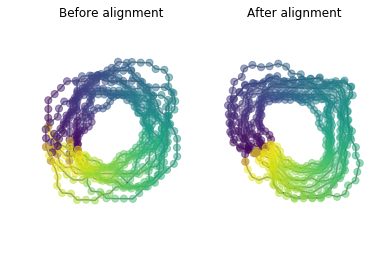

In [64]:
_ = vc.align_contours(show_samples=10)

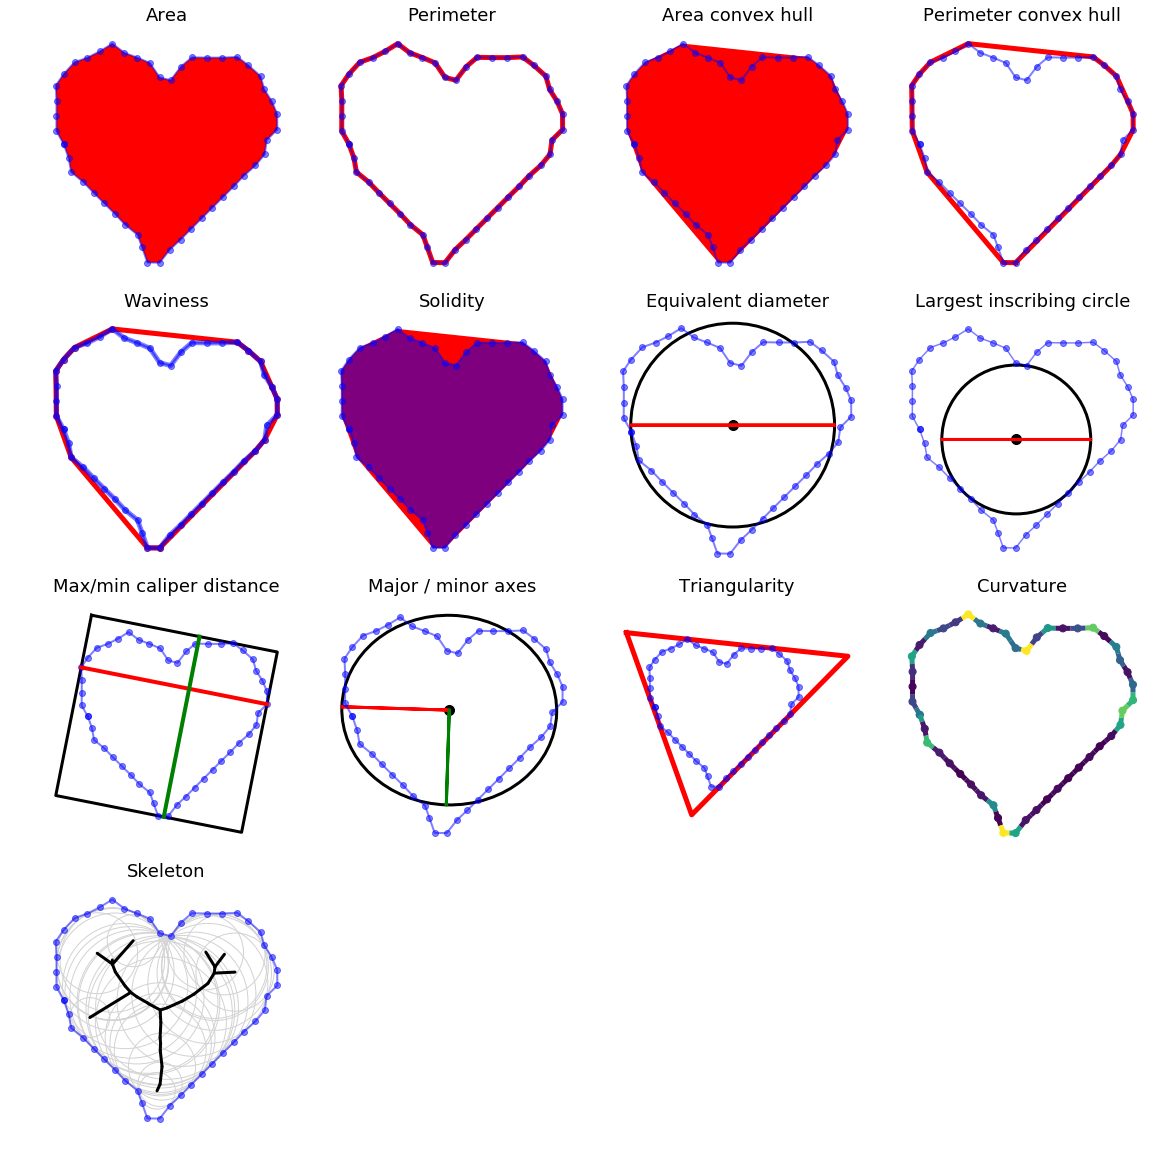

In [65]:
from cellshapy.utils.contours import extract_shape_descriptors
_ = vc[-2][-11].extract_shape_descriptors(plot=True, skeleton=True)


# Shape space

In [17]:
vc.embed_shapes(source='contours', method='pca', n_components=2)

`pca` embedding for `contours` done (0.07 s).


/home/debacwa/Work/cellshapy/cellshapy/plotting/shapespace.py:51: UserWarning: No need to perform pca projection. Data already 2D.


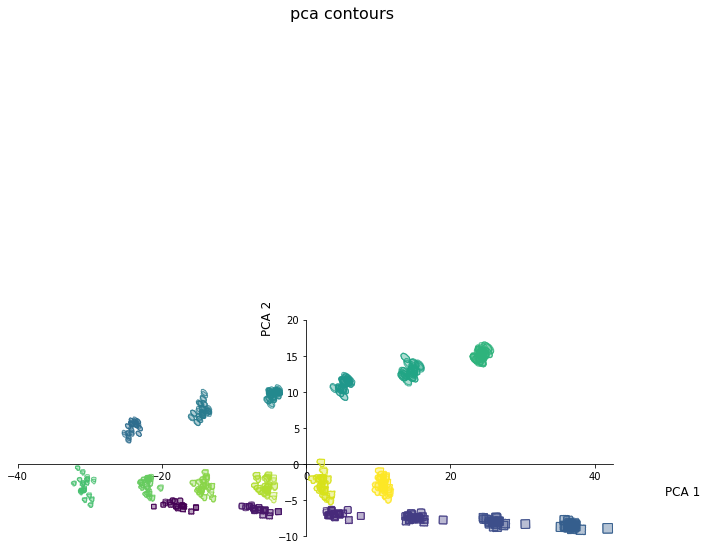

In [18]:
_ = vc.shape_space('contours', 'pca', colorcode='video', shape_size=20, 
                   show_shapes=True, show_trajectories=False,
                   alpha_face=.2, alpha_edge=.8)

# Morph space - VAE

/home/debacwa/Work/cellshapy/cellshapy/data/videocollection.py:717: UserWarning: VAE is experimental! Limited compatibility.
/home/debacwa/Work/cellshapy/cellshapy/analysis/vae.py:66: UserWarning: Tensor was zero-padded from (18, 40, 96) to (18, 48, 96).


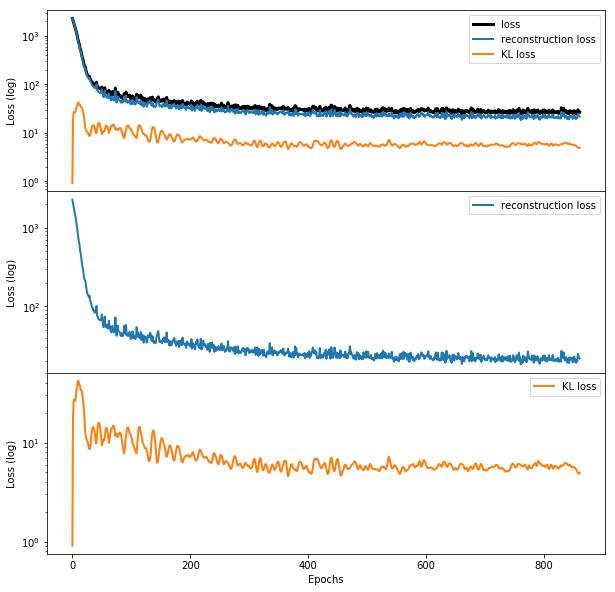

In [135]:
vc.embed_morphs(format='stxy', method='vae', n_components=3, plot=False, verbose=False)

components = None


/home/debacwa/Work/cellshapy/cellshapy/plotting/morphspace.py:93: UserWarning: Projecting from 3 components to 2D using pca.


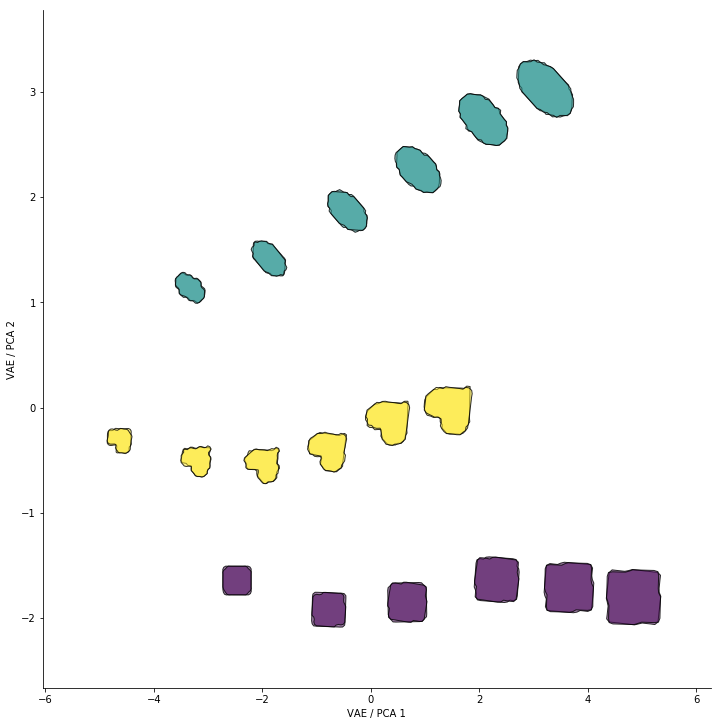

In [136]:
fig = vc.morph_space(format='stxy', method='vae', shape_size=5.0, duration=5.0, alpha_face=0.5, 
                     colorcode='label', animate=False, frames=[10,20], projection='pca')


In [144]:
emb = vc.embedding[('stxy', 'vae')]
emb.shape

(18, 3)

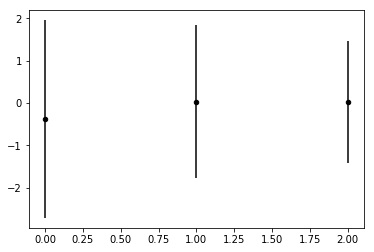

In [147]:
emb = vc.embedding[('stxy', 'vae')]
fig, ax = plt.subplots(1,1)
ax.scatter(range(emb.shape[1]), np.mean(emb, axis=0), s=20, c='k')
ax.vlines(range(emb.shape[1]), ymin=np.mean(emb, axis=0)-np.std(emb, axis=0), ymax=np.mean(emb, axis=0)+np.std(emb, axis=0))


<StemContainer object of 3 artists>

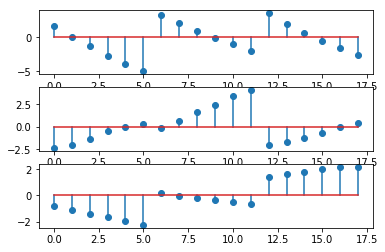

In [139]:
emb = vc.embedding[('stxy', 'vae')]
fig, ax = plt.subplots(3,1)
ax[0].stem(emb[:,0])
ax[1].stem(emb[:,1])
ax[2].stem(emb[:,2])

# Morph space -  Parafac

`parafac` embedding for `stxy`

Using numpy backend.


 done (0.67 s).


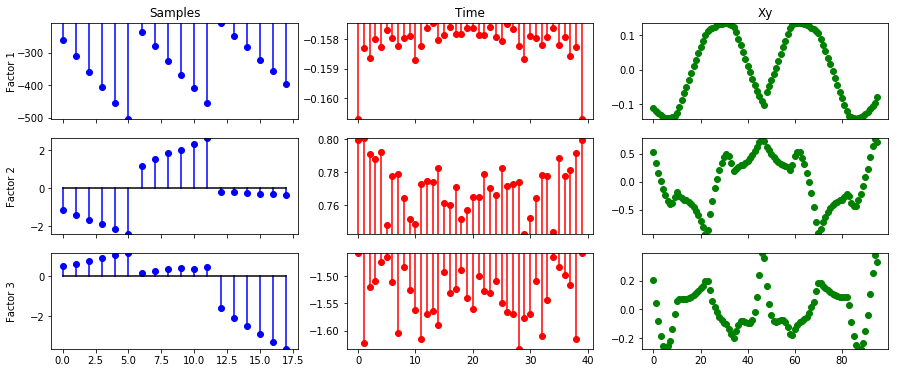

In [148]:
vc.embed_morphs(format='stxy', method='parafac', n_components=3, plot=True)

num_frames = 40


/home/debacwa/Work/cellshapy/cellshapy/plotting/morphspace.py:375: UserWarning: Projecting from 3 components to 2D using pca.


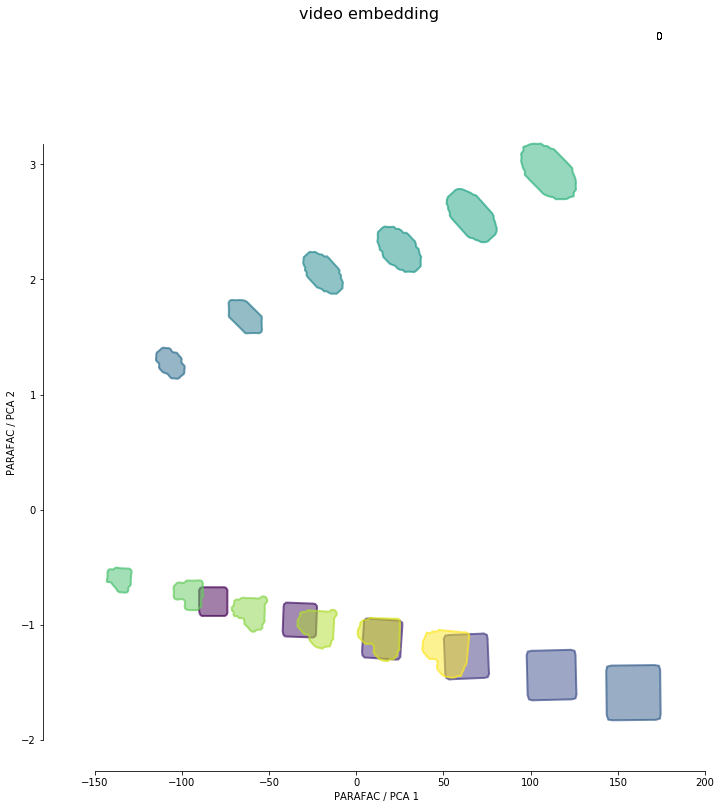

In [150]:
anim = vc.morph_space(format='stxy', method='parafac', projection='pca', shape_size=5.0, duration=5.0, alpha_face=0.5, colorcode='video')
HTML(anim.to_html5_video())

In [62]:
a = vc.embedding['stxy', 'parafac'][0]
import ipyvolume as ipv
ipv.quickscatter(*a.T, size=5, marker="sphere")

# Morph space - Tucker

In [153]:
vc.embed_morphs(format='stxy', method='tucker', n_components=3)

`tucker` embedding for `stxy` done (0.01 s).


num_frames = 40


/home/debacwa/Work/cellshapy/cellshapy/plotting/morphspace.py:375: UserWarning: Projecting from 3 components to 2D using pca.


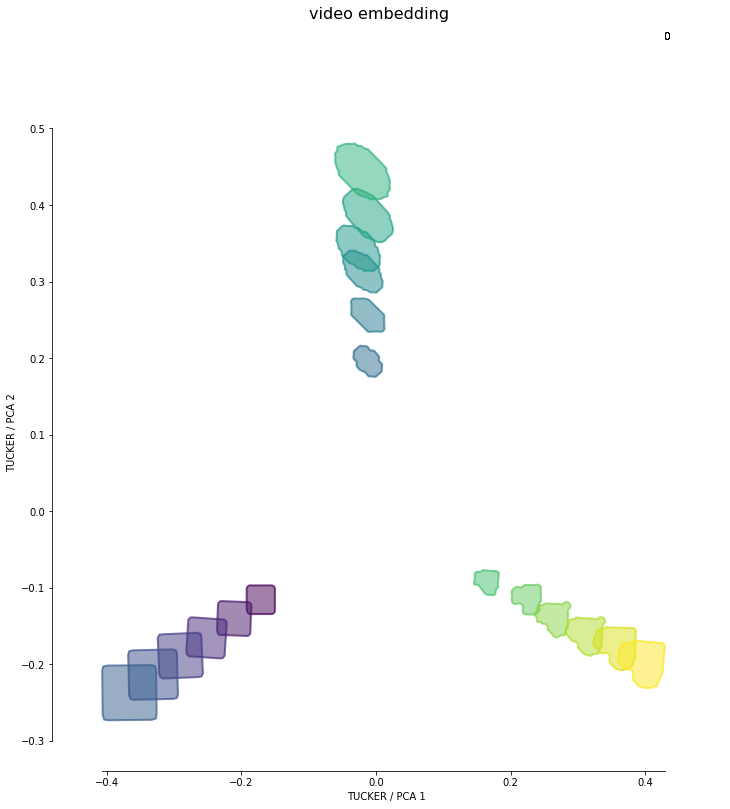

In [154]:
anim = vc.morph_space(format='stxy', method='tucker', projection='pca', shape_size=5.0, duration=5.0, alpha_face=0.5, colorcode='video')
HTML(anim.to_html5_video())

In [155]:
a = vc.embedding['stxy', 'tucker'][0][0]
import ipyvolume.pylab as ipv
#ipv.xlim(a[0].min(),a[0].max())
ipv.scatter(*a.T, size=5, marker="sphere")


Scatter(color_selected=array('white', dtype='<U5'), geo='sphere', line_material=ShaderMaterial(), material=Sha…